In [1]:
# import modules 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
paris = pd.read_csv('paris_2.csv')

In [3]:
# split data into listings with reviews and those without 

paris_rev = paris[paris['reviews'] > 0]
paris_notrev = paris[paris['reviews'] == 0]

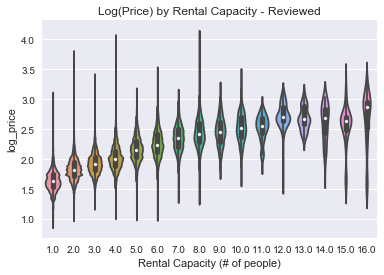

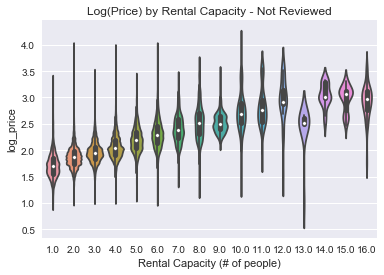

In [4]:
# examine rental capacity 
sns.violinplot(paris_rev.accommodates, paris_rev.log_price)
# plt.ylabel('Log(Price)')
plt.xlabel('Rental Capacity (# of people)')
plt.title('Log(Price) by Rental Capacity - Reviewed')
plt.show()

# examine rental capacity 
sns.violinplot(paris_notrev.accommodates, paris_notrev.log_price)
#plt.ylabel('Log(Price)')
plt.xlabel('Rental Capacity (# of people)')
plt.title('Log(Price) by Rental Capacity - Not Reviewed')
plt.show()

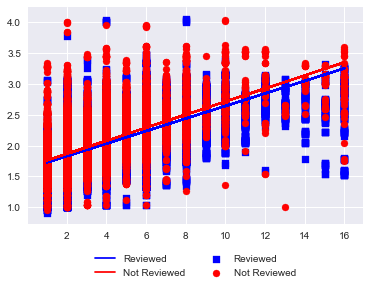

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(paris_rev.accommodates, paris_rev.log_price, c='b', marker="s", label='Reviewed')
m, b = np.polyfit(paris_rev.accommodates, paris_rev.log_price, 1)
ax1.plot(paris_rev.accommodates, m*paris_rev.accommodates + b, '-', c = 'b', label = 'Reviewed')
ax1.scatter(paris_notrev.accommodates, paris_notrev.log_price, c='r', marker="o", label='Not Reviewed')
l, p = np.polyfit(paris_notrev.accommodates, paris_notrev.log_price, 1)
ax1.plot(paris_notrev.accommodates, l*paris_notrev.accommodates + p, '-', c = 'r', label = 'Not Reviewed')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

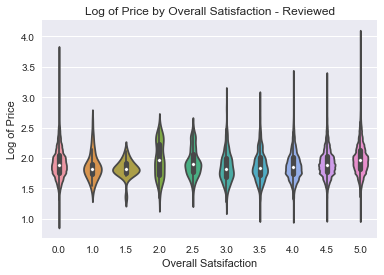

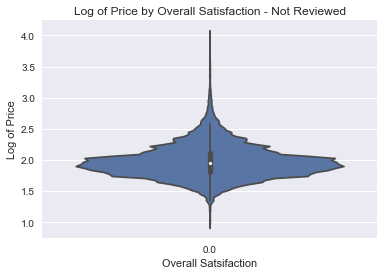

In [6]:
sns.violinplot(paris_rev.overall_satisfaction, paris_rev.log_price)
plt.xlabel('Overall Satsifaction')
plt.ylabel('Log of Price')
plt.title('Log of Price by Overall Satisfaction - Reviewed')
plt.show()

sns.violinplot(paris_notrev.overall_satisfaction, paris_notrev.log_price)
plt.xlabel('Overall Satsifaction')
plt.ylabel('Log of Price')
plt.title('Log of Price by Overall Satisfaction - Not Reviewed')
plt.show()

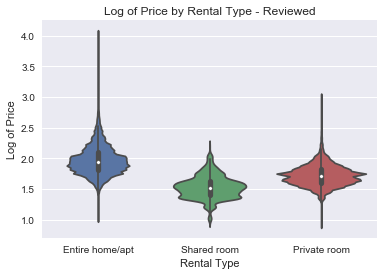

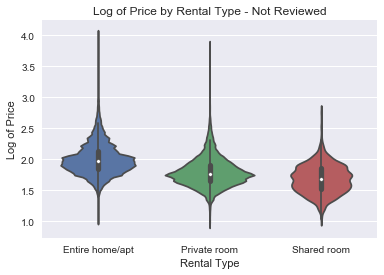

In [7]:
sns.violinplot(paris_rev.room_type, paris_rev.log_price)
plt.ylabel('Log of Price')
plt.xlabel('Rental Type')
plt.title('Log of Price by Rental Type - Reviewed')
plt.show()

sns.violinplot(paris_notrev.room_type, paris_notrev.log_price)
plt.ylabel('Log of Price')
plt.xlabel('Rental Type')
plt.title('Log of Price by Rental Type - Not Reviewed')
plt.show()

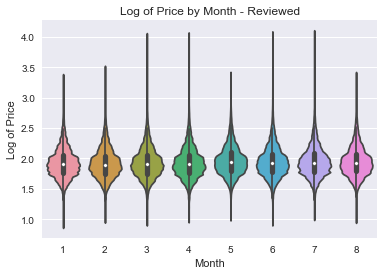

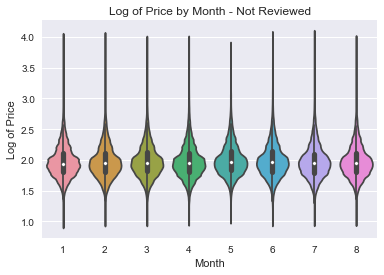

In [8]:
sns.violinplot(paris_rev.month, paris_rev.log_price)
plt.xlabel('Month')
plt.ylabel('Log of Price')
plt.title('Log of Price by Month - Reviewed')
plt.show()

sns.violinplot(paris_notrev.month, paris_notrev.log_price)
plt.xlabel('Month')
plt.ylabel('Log of Price')
plt.title('Log of Price by Month - Not Reviewed')
plt.show()

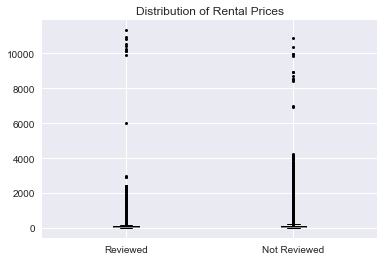

In [9]:
plt.boxplot([paris_rev.price, paris_notrev.price], sym='k.')
plt.xticks([1, 2], ['Reviewed', 'Not Reviewed'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

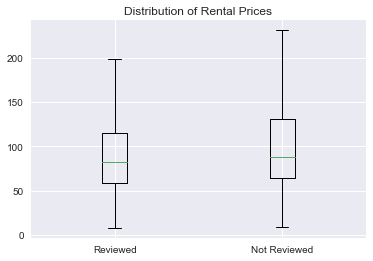

In [10]:
plt.boxplot([paris_rev.price, paris_notrev.price], showfliers=False, sym='k.')
plt.xticks([1, 2], ['Reviewed', 'Not Reviewed'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

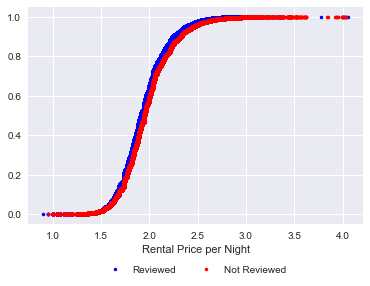

In [11]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x,y

x_rev, y_rev = ecdf(paris_rev.log_price)
x_nr, y_nr = ecdf(paris_notrev.log_price)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(x_rev, y_rev, marker='.', linestyle='none', c='b', label='Reviewed')
ax1.plot(x_nr, y_nr, marker='.', linestyle='none', c = 'r', label = 'Not Reviewed')
plt.xlabel('Rental Price per Night')
#plt.ylabel('ECDF')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

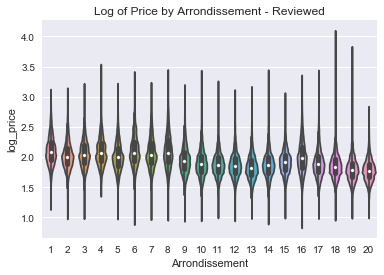

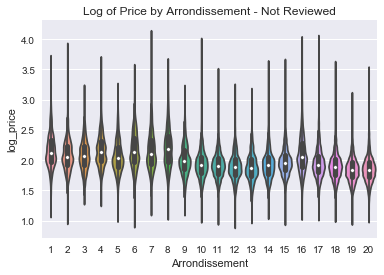

In [12]:
sns.violinplot(paris_rev.arrondissement, paris_rev.log_price)
plt.xlabel('Arrondissement')
# plt.ylabel('Log Price')
plt.title('Log of Price by Arrondissement - Reviewed')
plt.show()

sns.violinplot(paris_notrev.arrondissement, paris_notrev.log_price)
plt.xlabel('Arrondissement')
# plt.ylabel('Log Price')
plt.title('Log of Price by Arrondissement - Not Reviewed')
plt.show()

In [13]:
# linear regression - reviewed vs not reviewed 
X = paris_rev.drop(['Unnamed: 0', 'Unnamed: 0.1', 'host_id', 'neighborhood', 'last_modified', 'minstay', 
                     'price', 'room_id', 'log_price', 'reviews', 'overall_satisfaction'], axis=1)

In [14]:
X = pd.get_dummies(X, columns = ['room_type', 'month', 'arrondissement'])


In [15]:
X = X.drop(['arrondissement_20', 'room_type_Entire home/apt', 'month_1'], axis=1)

In [16]:
X_nr = paris_notrev.drop(['Unnamed: 0', 'Unnamed: 0.1', 'host_id', 'neighborhood', 'last_modified', 'minstay', 
                     'price', 'room_id', 'log_price', 'reviews', 'overall_satisfaction'], axis=1)
X_nr= pd.get_dummies(X_nr, columns = ['room_type', 'month', 'arrondissement'])


In [17]:
X_nr = X_nr.drop(['arrondissement_20', 'room_type_Entire home/apt', 'month_1'], axis=1)

In [18]:
# regression  - rentals that have been reviewed 
import statsmodels.api as sm
from statsmodels.formula.api import ols

y_rev = paris_rev.log_price

lm_rev = sm.OLS(y_rev, X).fit()

print(lm_rev.summary())

/Users/sarahjordan/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 4.887e+05
Date:                Sun, 18 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:10:52   Log-Likelihood:            -1.4225e+05
No. Observations:              441443   AIC:                         2.846e+05
Df Residuals:                  441413   BIC:                         2.849e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
accommodates               0

In [19]:
# regression - rentals that have not been reviewed 

y_nr = paris_notrev.log_price

lm_nr = sm.OLS(y_nr, X_nr).fit()

print(lm_nr.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 1.694e+05
Date:                Sun, 18 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:10:55   Log-Likelihood:                -75451.
No. Observations:              179432   AIC:                         1.510e+05
Df Residuals:                  179402   BIC:                         1.513e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
accommodates               0

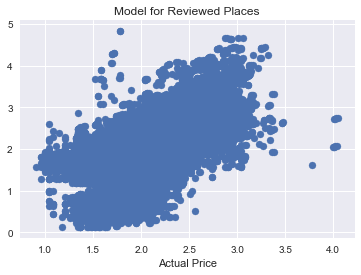

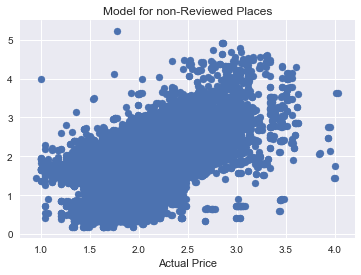

In [20]:
plt.scatter(paris_rev.log_price, lm_rev.predict(X))
plt.xlabel('Actual Price')
# plt.ylabel('Model Predicted Price')
plt.title('Model for Reviewed Places')
plt.show()

plt.scatter(paris_notrev.log_price, lm_nr.predict(X_nr))
plt.xlabel('Actual Price')
# plt.ylabel('Model Predicted Price')
plt.title('Model for non-Reviewed Places')
plt.show()

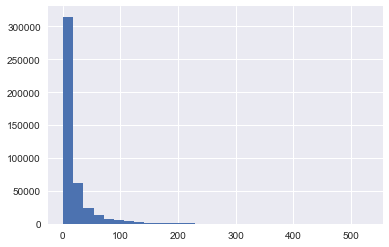

In [21]:
# Split by high reviews, low reviews

plt.hist(paris_rev.reviews, bins=30)
plt.show()

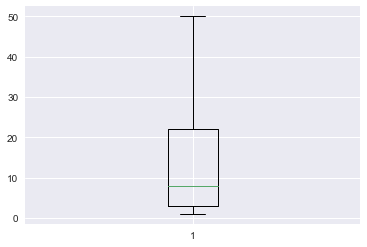

In [22]:
plt.boxplot(paris_rev.reviews.values, showfliers=False)
plt.show()

In [23]:
np.percentile(paris_rev.reviews, 25)

3.0

In [24]:
np.percentile(paris_rev.reviews, 75)

22.0

In [24]:
np.percentile(paris_rev.reviews, 95)

79.0

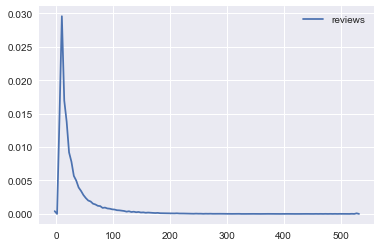

In [25]:
sns.kdeplot(paris_rev.reviews)
plt.show()

In [34]:
paris_regular = paris_rev[paris_rev['reviews'] <= 22]
paris_highish = paris_rev[paris_rev['reviews'] > 22]

In [25]:
paris_low = paris[paris['reviews'] <= 22]
paris_reg = paris[paris['reviews'] > 22]

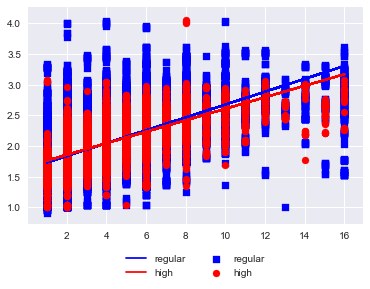

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(paris_low.accommodates, paris_low.log_price, c='b', marker="s", label='regular')
m, b = np.polyfit(paris_low.accommodates, paris_low.log_price, 1)
ax1.plot(paris_low.accommodates, m*paris_low.accommodates + b, '-', c = 'b', label = 'regular')
ax1.scatter(paris_reg.accommodates, paris_reg.log_price, c='r', marker="o", label='high')
l, p = np.polyfit(paris_reg.accommodates, paris_reg.log_price, 1)
ax1.plot(paris_reg.accommodates, l*paris_reg.accommodates + p, '-', c = 'r', label = 'high')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

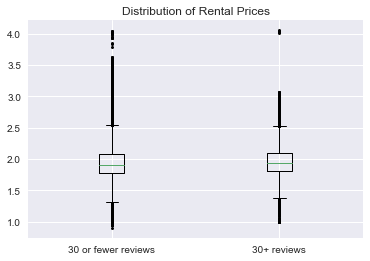

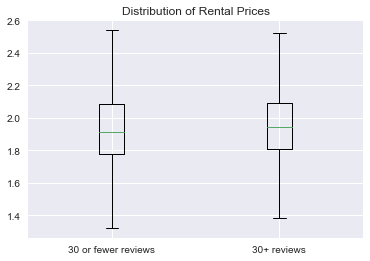

In [28]:
paris_low = paris[paris['reviews'] <= 22]
paris_reg = paris[paris['reviews'] > 22]

plt.boxplot([paris_low.log_price, paris_reg.log_price], sym='k.')
plt.xticks([1, 2], ['30 or fewer reviews', '30+ reviews'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

plt.boxplot([paris_low.log_price, paris_reg.log_price], showfliers=False)
plt.xticks([1, 2], ['30 or fewer reviews', '30+ reviews'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

In [35]:
X_regular = paris_regular.drop(['Unnamed: 0', 'Unnamed: 0.1', 'host_id', 'neighborhood', 'last_modified', 'minstay', 
                     'price', 'room_id', 'log_price', 'reviews', 'overall_satisfaction'], axis=1)

X_regular = pd.get_dummies(X_regular, columns = ['room_type', 'month', 'arrondissement'])

X_regular = X_regular.drop(['arrondissement_20', 'room_type_Entire home/apt', 'month_1'], axis=1)

In [36]:
X_highish = paris_highish.drop(['Unnamed: 0', 'Unnamed: 0.1', 'host_id', 'neighborhood', 'last_modified', 'minstay', 
                     'price', 'room_id', 'log_price', 'reviews', 'overall_satisfaction'], axis=1)

X_highish = pd.get_dummies(X_highish, columns = ['room_type', 'month', 'arrondissement'])

X_highish = X_highish.drop(['arrondissement_20', 'room_type_Entire home/apt', 'month_1'], axis=1)

In [37]:
# regression for reviewed houses below 75th percentile

y_regular = paris_regular.log_price

lm_regular = sm.OLS(y_regular, X_regular).fit()

print(lm_regular.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 3.475e+05
Date:                Sun, 18 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:17:58   Log-Likelihood:            -1.1723e+05
No. Observations:              334898   AIC:                         2.345e+05
Df Residuals:                  334868   BIC:                         2.348e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
accommodates               0

In [38]:
# regression for things above 75th percentile 

y_highish = paris_highish.log_price

lm_highish = sm.OLS(y_highish, X_highish).fit()

print(lm_highish.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.568e+05
Date:                Sun, 18 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:18:52   Log-Likelihood:                -20698.
No. Observations:              106545   AIC:                         4.146e+04
Df Residuals:                  106515   BIC:                         4.174e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
accommodates               0

In [39]:
# split data into high and low number of reviews based on 95th percentile 

paris_reg = paris[paris['reviews'] <= 79]
paris_high = paris[paris['reviews'] > 79]

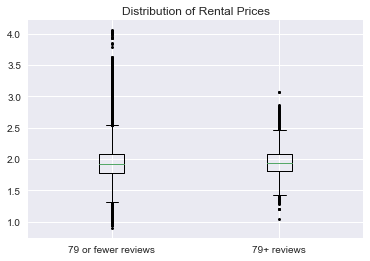

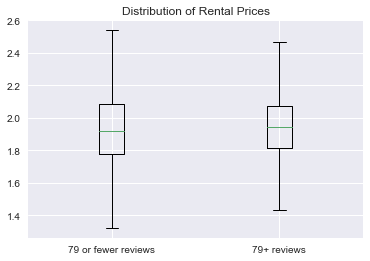

In [40]:
# examine data 

plt.boxplot([paris_reg.log_price, paris_high.log_price], sym='k.')
plt.xticks([1, 2], ['79 or fewer reviews', '79+ reviews'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

plt.boxplot([paris_reg.log_price, paris_high.log_price], showfliers=False)
plt.xticks([1, 2], ['79 or fewer reviews', '79+ reviews'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

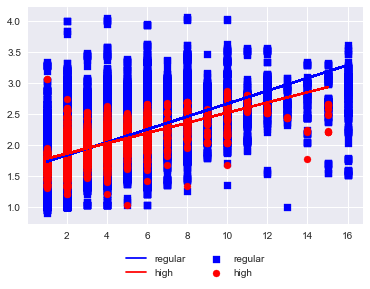

In [41]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(paris_reg.accommodates, paris_reg.log_price, c='b', marker="s", label='regular')
m, b = np.polyfit(paris_reg.accommodates, paris_reg.log_price, 1)
ax1.plot(paris_reg.accommodates, m*paris_reg.accommodates + b, '-', c = 'b', label = 'regular')
ax1.scatter(paris_high.accommodates, paris_high.log_price, c='r', marker="o", label='high')
l, p = np.polyfit(paris_high.accommodates, paris_high.log_price, 1)
ax1.plot(paris_high.accommodates, l*paris_high.accommodates + p, '-', c = 'r', label = 'high')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

In [42]:
# linear regression - rentals with high number of reviews versus typical number of reviews 

X_reg = paris_reg.drop(['Unnamed: 0', 'Unnamed: 0.1', 'host_id', 'neighborhood', 'last_modified', 'minstay', 
                     'price', 'room_id', 'log_price', 'reviews', 'overall_satisfaction'], axis=1)

X_reg = pd.get_dummies(X_reg, columns = ['room_type', 'month', 'arrondissement'])

X_reg = X_reg.drop(['arrondissement_20', 'room_type_Entire home/apt', 'month_1'], axis=1)

In [43]:
X_high = paris_high.drop(['Unnamed: 0', 'Unnamed: 0.1', 'host_id', 'neighborhood', 'last_modified', 'minstay', 
                     'price', 'room_id', 'log_price', 'reviews', 'overall_satisfaction'], axis=1)

X_high = pd.get_dummies(X_high, columns = ['room_type', 'month', 'arrondissement'])

X_high = X_high.drop(['arrondissement_20', 'room_type_Entire home/apt', 'month_1'], axis=1)

In [44]:
# regression: rentals with typical number of reviews 

y_reg = paris_reg.log_price

lm_reg = sm.OLS(y_reg, X_reg).fit()

print(lm_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 6.171e+05
Date:                Sun, 18 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:19:24   Log-Likelihood:            -2.1755e+05
No. Observations:              598835   AIC:                         4.352e+05
Df Residuals:                  598805   BIC:                         4.355e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
accommodates               0

In [41]:
# regression - rentals with high number of reviews 

y_high = paris_high.log_price

lm_high = sm.OLS(y_high, X_high).fit()

print(lm_high.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 4.505e+04
Date:                Sun, 18 Mar 2018   Prob (F-statistic):               0.00
Time:                        13:01:08   Log-Likelihood:                -568.01
No. Observations:               22040   AIC:                             1196.
Df Residuals:                   22010   BIC:                             1436.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
accommodates               0

In [45]:
# Naive Bayes
# Interested in the probability of rental given rental features 

paris.head()

,Unnamed: 0,Unnamed: 0.1,accommodates,bedrooms,host_id,last_modified,minstay,neighborhood,overall_satisfaction,price,reviews,room_id,room_type,log_price,month,arrondissement
0,0,0,2.0,0.0,48402938.0,2016-01-03 04:33:09.048358,3.0,Necker,0.0,56.0,0,9325859,Entire home/apt,1.748188,1,15
1,1,1,4.0,1.0,24291639.0,2016-01-03 04:33:07.037926,5.0,Gros-Caillou,4.5,112.0,11,4699157,Entire home/apt,2.049218,1,7
2,2,2,4.0,2.0,7256807.0,2016-01-03 04:33:04.911608,3.0,Chaillot,4.5,133.0,30,1338178,Entire home/apt,2.123852,1,16
3,3,3,2.0,1.0,18185261.0,2016-01-03 04:32:56.798397,2.0,Roquette,5.0,112.0,5,7352955,Entire home/apt,2.049218,1,11
4,4,4,4.0,1.0,30525314.0,2016-01-03 04:32:46.231010,1.0,Père-Lachaise,0.0,73.0,0,5878224,Entire home/apt,1.863323,1,20


In [46]:
paris.describe()

,Unnamed: 0,Unnamed: 0.1,accommodates,bedrooms,host_id,minstay,overall_satisfaction,price,reviews,room_id,log_price,month,arrondissement
count,620875.000000,620875.000000,620875.000000,620875.000000,6.208750e+05,620875.000000,620875.000000,620875.000000,620875.000000,6.208750e+05,620875.000000,620875.000000,620875.000000
mean,310437.000000,31411.748429,3.078145,1.065128,2.787181e+07,1.354869,2.696545,109.039984,14.047401,8.736191e+06,1.949419,3.931474,11.996709
std,179231.318528,18354.051515,1.487094,0.806276,2.864155e+07,2.103294,2.294549,118.205766,28.282831,5.414301e+06,0.251831,2.340141,5.538192
min,0.000000,0.000000,1.000000,0.000000,1.415000e+03,1.000000,0.000000,8.000000,0.000000,2.525000e+03,0.903090,1.000000,1.000000
25%,155218.500000,15349.000000,2.000000,1.000000,6.741410e+06,1.000000,0.000000,60.000000,0.000000,4.035564e+06,1.778151,2.000000,8.000000
50%,310437.000000,31470.000000,2.000000,1.000000,1.742267e+07,1.000000,4.500000,84.000000,4.000000,8.139247e+06,1.924279,4.000000,12.000000
75%,465655.500000,46953.000000,4.000000,1.000000,3.866390e+07,1.000000,4.500000,121.000000,14.000000,1.341992e+07,2.082785,6.000000,17.000000
max,620874.000000,70157.000000,16.000000,10.000000,1.432046e+08,695.000000,5.000000,11323.000000,529.000000,2.014408e+07,4.053962,8.000000,20.000000


In [47]:
paris_categorical = pd.read_csv('paris_2.csv')

In [48]:
# turn continuous data into categorical data for naive bayes

paris_categorical['accommodates'] = pd.cut(paris.accommodates, bins=3, labels = ['low', 'medium', 'high'])

paris_categorical['bedrooms'] = pd.cut(paris.bedrooms, bins=3, labels = ['low', 'medium', 'high'])

paris_categorical['log_price'] = pd.cut(paris.log_price, bins=4, labels = ['low', 'medium', 'high', 'very high'])

In [49]:
# convert to dummy variables 
paris_categorical = pd.get_dummies(paris_categorical, columns = ['accommodates', 'bedrooms', 'room_type', 'month', 'arrondissement', 
                                                'log_price'])

In [50]:
# add a binary variable for booked or not booked (0 reviews or more than 0 reviews)

paris_categorical['booked'] = np.nan
paris_categorical.loc[paris_categorical['reviews'] >= 1, 'booked'] = int(1)
paris_categorical.loc[paris_categorical['reviews'] == 0, 'booked'] = int(0)
paris_categorical.head() 

,Unnamed: 0,Unnamed: 0.1,host_id,last_modified,minstay,neighborhood,overall_satisfaction,price,reviews,room_id,...,arrondissement_16,arrondissement_17,arrondissement_18,arrondissement_19,arrondissement_20,log_price_high,log_price_low,log_price_medium,log_price_very high,booked
0,0,0,48402938.0,2016-01-03 04:33:09.048358,3.0,Necker,0.0,56.0,0,9325859,...,0,0,0,0,0,0,0,1,0,0.0
1,1,1,24291639.0,2016-01-03 04:33:07.037926,5.0,Gros-Caillou,4.5,112.0,11,4699157,...,0,0,0,0,0,0,0,1,0,1.0
2,2,2,7256807.0,2016-01-03 04:33:04.911608,3.0,Chaillot,4.5,133.0,30,1338178,...,1,0,0,0,0,0,0,1,0,1.0
3,3,3,18185261.0,2016-01-03 04:32:56.798397,2.0,Roquette,5.0,112.0,5,7352955,...,0,0,0,0,0,0,0,1,0,1.0
4,4,4,30525314.0,2016-01-03 04:32:46.231010,1.0,Père-Lachaise,0.0,73.0,0,5878224,...,0,0,0,0,1,0,0,1,0,0.0


In [51]:
# create X for naive bayes model

X_nb = paris_categorical[['accommodates_medium', 'accommodates_high',
       'bedrooms_high', 'bedrooms_medium',
       'room_type_Private room',
       'room_type_Shared room', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'arrondissement_1',
       'arrondissement_2', 'arrondissement_3', 'arrondissement_4',
       'arrondissement_5', 'arrondissement_6', 'arrondissement_7',
       'arrondissement_8', 'arrondissement_9', 'arrondissement_10',
       'arrondissement_11', 'arrondissement_12', 'arrondissement_13',
       'arrondissement_14', 'arrondissement_15', 'arrondissement_16',
       'arrondissement_17', 'arrondissement_18', 'arrondissement_19', 'log_price_high',
       'log_price_medium', 'log_price_very high']]

In [52]:
# create y for naive bayes model

y = paris_categorical['booked']

In [53]:
# bernoulli naive bayes model

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_nb, y, test_size=0.2)
clf = BernoulliNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

0.711737467284
[[  156 35709]
 [   86 88224]]


In [54]:
# check for class imbalance
print(len(paris_categorical[paris_categorical['booked'] == 1])/len(paris_categorical.booked))
print(len(paris_categorical[paris_categorical['booked'] == 0])/len(paris_categorical.booked))

# resample the data for balance
from sklearn.utils import resample
paris_maj = paris_categorical[paris_categorical['booked'] == 1]
paris_min = paris_categorical[paris_categorical['booked'] == 0]


paris_min_up = resample(paris_min, 
                        replace=True,     # sample with replacement
                        n_samples=441443,    # to match majority class
                        random_state=123) # reproducible results


paris_balanced = pd.concat([paris_maj, paris_min_up])

# get data for x and y
X_bal = paris_balanced[['accommodates_medium', 'accommodates_high',
       'bedrooms_high', 'bedrooms_medium',
       'room_type_Private room',
       'room_type_Shared room', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'arrondissement_1',
       'arrondissement_2', 'arrondissement_3', 'arrondissement_4',
       'arrondissement_5', 'arrondissement_6', 'arrondissement_7',
       'arrondissement_8', 'arrondissement_9', 'arrondissement_10',
       'arrondissement_11', 'arrondissement_12', 'arrondissement_13',
       'arrondissement_14', 'arrondissement_15', 'arrondissement_16',
       'arrondissement_17', 'arrondissement_18', 'arrondissement_19', 'log_price_high',
       'log_price_medium', 'log_price_very high']]

y_bal = paris_balanced['booked']


# re run naive bayes classifier
x_train, x_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2)
clf = BernoulliNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

0.7110014093013892
0.28899859069861084


In [55]:
# get accuracy and confusion matrix. 

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

0.562080213843
[[47892 40511]
 [36816 51359]]


Lost accuracy, gained precision, but not doing a great job of predicting.

In [56]:
# break up review data into multiple classes 

pctile_5 = np.percentile(paris_rev.reviews, 5)
pctile_25 = np.percentile(paris_rev.reviews, 25)
pctile_75 = np.percentile(paris_rev.reviews, 75)
pctile_95 = np.percentile(paris_rev.reviews, 95)



In [57]:
paris_categorical['booking_amounts'] = np.nan
paris_categorical.loc[paris_categorical['reviews'] ==0, 'booking_amounts'] = 'none'
paris_categorical.loc[(paris_categorical['reviews'] >= pctile_5) & (paris_categorical['reviews'] <= pctile_25), 'booking_amounts'] = 'low'
paris_categorical.loc[(paris_categorical['reviews'] > pctile_25) & (paris_categorical['reviews'] <= 75), 'booking_amounts'] = 'typical'
paris_categorical.loc[(paris_categorical['reviews'] > pctile_75) & (paris_categorical['reviews'] <= 95), 'booking_amounts'] = 'high'
paris_categorical.loc[paris_categorical['reviews'] > pctile_95, 'booking_amounts'] = 'very high'
paris_categorical.head() 

,Unnamed: 0,Unnamed: 0.1,host_id,last_modified,minstay,neighborhood,overall_satisfaction,price,reviews,room_id,...,arrondissement_17,arrondissement_18,arrondissement_19,arrondissement_20,log_price_high,log_price_low,log_price_medium,log_price_very high,booked,booking_amounts
0,0,0,48402938.0,2016-01-03 04:33:09.048358,3.0,Necker,0.0,56.0,0,9325859,...,0,0,0,0,0,0,1,0,0.0,none
1,1,1,24291639.0,2016-01-03 04:33:07.037926,5.0,Gros-Caillou,4.5,112.0,11,4699157,...,0,0,0,0,0,0,1,0,1.0,typical
2,2,2,7256807.0,2016-01-03 04:33:04.911608,3.0,Chaillot,4.5,133.0,30,1338178,...,0,0,0,0,0,0,1,0,1.0,high
3,3,3,18185261.0,2016-01-03 04:32:56.798397,2.0,Roquette,5.0,112.0,5,7352955,...,0,0,0,0,0,0,1,0,1.0,typical
4,4,4,30525314.0,2016-01-03 04:32:46.231010,1.0,Père-Lachaise,0.0,73.0,0,5878224,...,0,0,0,1,0,0,1,0,0.0,none


In [58]:
# split up x and y again, make y the categorical variable defined above 

X_nb = paris_categorical[['accommodates_medium', 'accommodates_high',
       'bedrooms_high', 'bedrooms_medium',
       'room_type_Private room',
       'room_type_Shared room', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'arrondissement_1',
       'arrondissement_2', 'arrondissement_3', 'arrondissement_4',
       'arrondissement_5', 'arrondissement_6', 'arrondissement_7',
       'arrondissement_8', 'arrondissement_9', 'arrondissement_10',
       'arrondissement_11', 'arrondissement_12', 'arrondissement_13',
       'arrondissement_14', 'arrondissement_15', 'arrondissement_16',
       'arrondissement_17', 'arrondissement_18', 'arrondissement_19', 'log_price_high',
       'log_price_medium', 'log_price_very high']]

y = paris_categorical['booking_amounts']


In [59]:
# create naive bayes classifier
x_train, x_test, y_train, y_test = train_test_split(X_nb, y, test_size=0.2)
clf = BernoulliNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [60]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print('none', len(paris_categorical[paris_categorical['booking_amounts']=='none'])/len(paris_categorical['booking_amounts']))
print('low', len(paris_categorical[paris_categorical['booking_amounts']=='low']) / len(paris_categorical['booking_amounts']))
print('high', len(paris_categorical[paris_categorical['booking_amounts']=='high']) /len(paris_categorical['booking_amounts']))
print('typical', len(paris_categorical[paris_categorical['booking_amounts']=='typical']) /len(paris_categorical['booking_amounts']))
print('very high', len(paris_categorical[paris_categorical['booking_amounts']=='very high']) /len(paris_categorical['booking_amounts']))

0.362343466881
none 0.28899859069861084
low 0.1887030400644252
high 0.13610630159049728
typical 0.35069377894101067
very high 0.03549828870545601


This is better than randomly assigning groups, but it is not actually performing very well. 

In [61]:
# try eliminating some variables

X_nb = paris_categorical[['accommodates_medium', 'accommodates_high',
       'bedrooms_high', 'bedrooms_medium',
       'room_type_Private room',
       'room_type_Shared room', 'log_price_high',
       'log_price_medium', 'log_price_very high']]

y = paris_categorical['booking_amounts']


# create naive bayes classifier
x_train, x_test, y_train, y_test = train_test_split(X_nb, y, test_size=0.2)
clf = BernoulliNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.354201731427


In [62]:
# add some back in 
X_nb = paris_categorical[['accommodates_medium', 'accommodates_high',
       'bedrooms_high', 'bedrooms_medium',
       'room_type_Private room',
       'room_type_Shared room', 'arrondissement_1',
       'arrondissement_2', 'arrondissement_3', 'arrondissement_4',
       'arrondissement_5', 'arrondissement_6', 'arrondissement_7',
       'arrondissement_8', 'arrondissement_9', 'arrondissement_10',
       'arrondissement_11', 'arrondissement_12', 'arrondissement_13',
       'arrondissement_14', 'arrondissement_15', 'arrondissement_16',
       'arrondissement_17', 'arrondissement_18', 'arrondissement_19', 'log_price_high',
       'log_price_medium', 'log_price_very high']]

y = paris_categorical['booking_amounts']

# create naive bayes classifier
x_train, x_test, y_train, y_test = train_test_split(X_nb, y, test_size=0.2)
clf = BernoulliNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.360676464667
